# `xarray` Practice

## Part 1

### `xarray` Data Structures

In [3]:
import xarray as xr

1. The relative filepath for the SST dataset we saw in the lesson is `../data/oisst-avhrr-v02r01.20220304.nc`.  Use the `open_dataset()` function to access the file.

In [4]:
sst = xr.open_dataset('../data/oisst-avhrr-v02r01.20220304.nc')

2. Display the HTML representation of the dataset (Put the Python variable name of the dataset alone in a cell, or as the last line of a cell).  Read the following information from the visual display of the dataset.
- What is the first and last values for latitude?
- What is the "institution" listed in the metadata?
- What date was this data taken?
- How many latitude values are there? How many longitude values?

In [5]:
# -89.875, 89.875
# NOAA/National Centers for Environmental Information
# March 4th 2022
# 720 latitudes, 1440 longitudes

3. Display just the `ice` data variable

In [6]:
sst['ice']
# or
sst.ice

<xarray.DataArray 'ice' (time: 1, zlev: 1, lat: 720, lon: 1440)>
[1036800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2022-03-04T12:00:00
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Attributes:
    long_name:  Sea ice concentration
    units:      %
    valid_min:  0
    valid_max:  100

### Indexing and Selecting Values

4. Select only the SST data between 30-48 North and 3-30 East

In [10]:
sst['sst'].sel(lat=slice(30, 48), lon=slice(3, 30))

<xarray.DataArray 'sst' (time: 1, zlev: 1, lat: 20, lon: 56)>
array([[[[      nan, ..., 15.589999],
         ...,
         [13.799999, ..., 14.83    ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2022-03-04T12:00:00
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 35.12 35.38 35.62 35.88 ... 39.12 39.38 39.62 39.88
  * lon      (lon) float32 6.125 6.375 6.625 6.875 ... 19.12 19.38 19.62 19.88
Attributes:
    long_name:  Daily sea surface temperature
    units:      Celsius
    valid_min:  -300
    valid_max:  4500

5. Use the `.plot()` method to view the subset of data you found in the previous question.

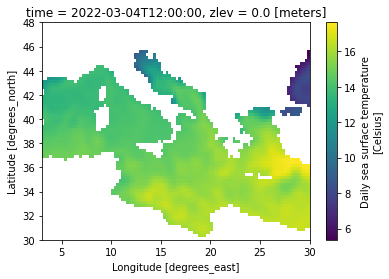

In [15]:
sst['sst'].sel(lat=slice(30, 48), lon=slice(3, 30)).plot()

Use the fake data below for the follow 2 questions.

In [48]:
import numpy as np

In [49]:
ndvi_values = np.random.rand(4, 5, 6)

time = ['2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01']
latitude  = [34.3, 34.4, 34.5, 34.6, 34.7]
longitude = [-118.3, -118.2, -118.1, -118.0, -117.9, -117.8]

ndvi = xr.DataArray(
    ndvi_values, 
    dims = ['time', 'latitude', 'longitude'],
    coords=[time, latitude, longitude]
    )


6. Write a line of code to select the 1st date from the `ndvi` data array.

In [50]:
ndvi.isel(time=0)

<xarray.DataArray (latitude: 5, longitude: 6)>
array([[0.67083346, 0.47625056, 0.9184469 , 0.72651922, 0.24089677,
        0.42439379],
       [0.74107856, 0.34296362, 0.15820154, 0.00260383, 0.36022595,
        0.54278431],
       [0.67529301, 0.27380767, 0.81509022, 0.57376185, 0.68329026,
        0.58127945],
       [0.15154031, 0.01281331, 0.47285499, 0.73580387, 0.25116267,
        0.13986412],
       [0.81409422, 0.85724215, 0.6082621 , 0.53236705, 0.67348339,
        0.16232365]])
Coordinates:
    time       <U10 '2022-02-01'
  * latitude   (latitude) float64 34.3 34.4 34.5 34.6 34.7
  * longitude  (longitude) float64 -118.3 -118.2 -118.1 -118.0 -117.9 -117.8

7. Write a line of code to select the date `2022-03-01` from the `ndvi` data array.

In [51]:
ndvi.sel(time='2022-03-01')

<xarray.DataArray (latitude: 5, longitude: 6)>
array([[0.85944156, 0.60486722, 0.4022808 , 0.64124882, 0.11660878,
        0.01823579],
       [0.21625069, 0.30129969, 0.13065388, 0.68583432, 0.60307187,
        0.7742624 ],
       [0.18151129, 0.79046703, 0.15992203, 0.34329714, 0.35068125,
        0.67729431],
       [0.26272801, 0.53743027, 0.98338776, 0.53127037, 0.00764959,
        0.65894408],
       [0.9652911 , 0.74733132, 0.12345072, 0.43297156, 0.66680729,
        0.59720625]])
Coordinates:
    time       <U10 '2022-03-01'
  * latitude   (latitude) float64 34.3 34.4 34.5 34.6 34.7
  * longitude  (longitude) float64 -118.3 -118.2 -118.1 -118.0 -117.9 -117.8

### Filepaths

You have been given a laminated piece of paper with the following file structure on it. This file structure is an abbreviated version of the file structure of the SARP laptops. `...` represents additional folder contents which are not shown in this diagram.

![Folder structure](../images/SARP_computer_structure.jpg)


To help you determine the filepaths you can use the provided laminated sheet with the filepath on it. For each path, do the following:

1. Circle the file that you are finding the path to
2. Circle the starting location of your file path. What will the starting location always be for an absolute filepath?  For a relative filepath, underline the file you are starting from and circle the starting directory.
3. Write down the starting directory For a relative filepath. In this step there is 1 possible option for an absolute filepath and 2 options for a relative filepath
4. Trace the lines from the starting directory to the end file. Whenever you cross a directory add the name of the directory to your filepath, followed by a `\`. 
5. Add the name of the file to the end of the filepath

#### Absolute Filepaths
1. `geopandas.ipynb`
2. `shrubland_change_Jan2022-Dec2006.mp4`
3. `dramatic_chipmunk.gif`

#### Relative Filepaths
1. `example_code.py` -> `dramatic_chipmunk.gif`
1. `geopandas.ipynb` -> `CAcountymap.geojson`
1. `extract_features.ipynb` -> `aviris_f1806t01p00r02_img`
3. `geopandas.ipynb` -> `aviris_f1806t01p00r02_img`
2. `classify_shrublands.ipynb` -> `dramatic_chipmunk.gif`

#### Absolute Filepaths
1. `C:\\Users\SARP\Documents\projects\lessons\geopandas.ipynb`
2. `C:\\Users\SARP\Documents\projects\crop_detection\visualizations\shrubland_change_Jan2022-Dec2006.mp4`
3. `C:\\Users\SARP\Desktop\dramatic_chipmunk.gif`

#### Relative Filepaths
1. from `example_code.py`: `.\dramatic_chipmunk.gif`
1. from `geopandas.ipynb`: `.\data\CAcountymap.geojson`
1. from `extract_features.ipynb`: `..\data\aviris_f1806t01p00r02_img`
3. from `geopandas.ipynb`: `..\crop_detection\data\aviris_f1806t01p00r02_img`
2. from `classify_shrublands.ipynb`:  `..\..\..\..\Desktop\dramatic_chipmunk.gif`



### More Filepaths

In the same folder as this one, there is a small file called `filepath_practice.txt`. Fill in the `relative_filepath` variable with a string of the relative path to that file. Run the pre-written code cell below it to read and print the contents of the text file.

In [21]:
relative_filepath = './filepath_practice.txt'

# Don't this code here. Just change the `relative_filepath` variable above
with open(relative_filepath) as f:
    line = f.readline()

print(line)

Congrats! You came up with the correct path to this file!



Now find the absolute filepath of that file. Copy and paste the code cell above, change the `relative_filepath` variable, and run the cell again.

In [22]:
# The exact answer will vary a bit based on where you put your file, but if it starts with
# C:\\ you correctly created an absolute filepath!
absolute_filepath = 'C:\\Users\SARP\Documents\projects\lessons\filepath_practice.txt'

# Don't this code here. Just change the `absolute_filepath` variable above
with open(relative_filepath) as f:
    line = f.readline()

print(line)

Congrats! You came up with the correct path to this file!



## Part 2

### Question 1

In [23]:
import numpy as np

In [24]:
ndvi_values = np.random.rand(4, 5, 6)

time = ['2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01']
latitude  = [34.3, 34.4, 34.5, 34.6, 34.7]
longitude = [-118.3, -118.2, -118.1, -118.0, -117.9, -117.8]


**A)** Make a DataArray out of the input values and dimensions above. The array should hold NDVI values (NDVI is a remote sensing calculation for the density of green stuff over an area). Be sure to specify both dimensions and coordinates. Describe in words what we know about the dimensions and location of the data.

In [25]:
import xarray as xr

In [26]:
ndvi = xr.DataArray(
    ndvi_values, 
    dims = ['time', 'latitude', 'longitude'],
    coords=[time, latitude, longitude]
    )

ndvi

<xarray.DataArray (time: 4, latitude: 5, longitude: 6)>
array([[[0.68651228, 0.5851944 , 0.14046095, 0.59327207, 0.78192937,
         0.23258851],
        [0.56747023, 0.25054011, 0.16226242, 0.6702321 , 0.00622384,
         0.74636596],
        [0.82834206, 0.98365364, 0.81008953, 0.89104479, 0.50119321,
         0.18034013],
        [0.39552168, 0.7685103 , 0.29270878, 0.35350123, 0.06396502,
         0.68518688],
        [0.77865295, 0.02244898, 0.39574131, 0.72681943, 0.69823106,
         0.78399236]],

       [[0.3034127 , 0.50315087, 0.54412261, 0.9464592 , 0.03947505,
         0.20151896],
        [0.43834579, 0.0129699 , 0.70769749, 0.84084285, 0.77547243,
         0.1261322 ],
        [0.11577085, 0.66309952, 0.82591069, 0.89350214, 0.46393369,
         0.58286982],
        [0.04440652, 0.7262668 , 0.63666472, 0.82946562, 0.63421775,
         0.84509512],
        [0.91268321, 0.6802709 , 0.23631077, 0.6578946 , 0.37326292,
...
         0.25262583],
        [0.89830431, 0.28967795, 0.92183892, 0.84662734, 0.19008297,
         0.8993965 ],
        [0.85601438, 0.24355797, 0.58250651, 0.83372457, 0.36688617,
         0.15849763],
        [0.59965386, 0.28360166, 0.81056124, 0.23754156, 0.49870335,
         0.01619106],
        [0.49591348, 0.42610319, 0.76554572, 0.418863  , 0.02294933,
         0.74291927]],

       [[0.95872348, 0.16487148, 0.64698601, 0.61055661, 0.55359241,
         0.33421169],
        [0.86063478, 0.99652218, 0.08394284, 0.99336335, 0.54771534,
         0.42460203],
        [0.76669502, 0.2152985 , 0.44321571, 0.85627454, 0.28993714,
         0.26782118],
        [0.53552128, 0.69865866, 0.92453794, 0.45578608, 0.91698321,
         0.91403326],
        [0.95763688, 0.10645779, 0.95289543, 0.92874398, 0.44976787,
         0.28583248]]])
Coordinates:
  * time       (time) <U10 '2022-02-01' '2022-03-01' '2022-04-01' '2022-05-01'
  * latitude   (latitude) float64 34.3 34.4 34.5 34.6 34.7
  * longitude  (longitude) float64 -118.3 -118.2 -118.1 -118.0 -117.9 -117.8

In [ ]:
ndvi = xr.DataArray(
    ndvi_values, 
    dims = ['time', 'latitude', 'longitude'],
    coords=[time, latitude, longitude]
    )

ndvi

<xarray.DataArray (time: 4, latitude: 5, longitude: 6)>
array([[[0.68651228, 0.5851944 , 0.14046095, 0.59327207, 0.78192937,
         0.23258851],
        [0.56747023, 0.25054011, 0.16226242, 0.6702321 , 0.00622384,
         0.74636596],
        [0.82834206, 0.98365364, 0.81008953, 0.89104479, 0.50119321,
         0.18034013],
        [0.39552168, 0.7685103 , 0.29270878, 0.35350123, 0.06396502,
         0.68518688],
        [0.77865295, 0.02244898, 0.39574131, 0.72681943, 0.69823106,
         0.78399236]],

       [[0.3034127 , 0.50315087, 0.54412261, 0.9464592 , 0.03947505,
         0.20151896],
        [0.43834579, 0.0129699 , 0.70769749, 0.84084285, 0.77547243,
         0.1261322 ],
        [0.11577085, 0.66309952, 0.82591069, 0.89350214, 0.46393369,
         0.58286982],
        [0.04440652, 0.7262668 , 0.63666472, 0.82946562, 0.63421775,
         0.84509512],
        [0.91268321, 0.6802709 , 0.23631077, 0.6578946 , 0.37326292,
...
         0.25262583],
        [0.89830431, 0.28967795, 0.92183892, 0.84662734, 0.19008297,
         0.8993965 ],
        [0.85601438, 0.24355797, 0.58250651, 0.83372457, 0.36688617,
         0.15849763],
        [0.59965386, 0.28360166, 0.81056124, 0.23754156, 0.49870335,
         0.01619106],
        [0.49591348, 0.42610319, 0.76554572, 0.418863  , 0.02294933,
         0.74291927]],

       [[0.95872348, 0.16487148, 0.64698601, 0.61055661, 0.55359241,
         0.33421169],
        [0.86063478, 0.99652218, 0.08394284, 0.99336335, 0.54771534,
         0.42460203],
        [0.76669502, 0.2152985 , 0.44321571, 0.85627454, 0.28993714,
         0.26782118],
        [0.53552128, 0.69865866, 0.92453794, 0.45578608, 0.91698321,
         0.91403326],
        [0.95763688, 0.10645779, 0.95289543, 0.92874398, 0.44976787,
         0.28583248]]])
Coordinates:
  * time       (time) <U10 '2022-02-01' '2022-03-01' '2022-04-01' '2022-05-01'
  * latitude   (latitude) float64 34.3 34.4 34.5 34.6 34.7
  * longitude  (longitude) float64 -118.3 -118.2 -118.1 -118.0 -117.9 -117.8

In [27]:
ndvi

<xarray.DataArray (time: 4, latitude: 5, longitude: 6)>
array([[[0.68651228, 0.5851944 , 0.14046095, 0.59327207, 0.78192937,
         0.23258851],
        [0.56747023, 0.25054011, 0.16226242, 0.6702321 , 0.00622384,
         0.74636596],
        [0.82834206, 0.98365364, 0.81008953, 0.89104479, 0.50119321,
         0.18034013],
        [0.39552168, 0.7685103 , 0.29270878, 0.35350123, 0.06396502,
         0.68518688],
        [0.77865295, 0.02244898, 0.39574131, 0.72681943, 0.69823106,
         0.78399236]],

       [[0.3034127 , 0.50315087, 0.54412261, 0.9464592 , 0.03947505,
         0.20151896],
        [0.43834579, 0.0129699 , 0.70769749, 0.84084285, 0.77547243,
         0.1261322 ],
        [0.11577085, 0.66309952, 0.82591069, 0.89350214, 0.46393369,
         0.58286982],
        [0.04440652, 0.7262668 , 0.63666472, 0.82946562, 0.63421775,
         0.84509512],
        [0.91268321, 0.6802709 , 0.23631077, 0.6578946 , 0.37326292,
...
         0.25262583],
        [0.89830431, 0.28967795, 0.92183892, 0.84662734, 0.19008297,
         0.8993965 ],
        [0.85601438, 0.24355797, 0.58250651, 0.83372457, 0.36688617,
         0.15849763],
        [0.59965386, 0.28360166, 0.81056124, 0.23754156, 0.49870335,
         0.01619106],
        [0.49591348, 0.42610319, 0.76554572, 0.418863  , 0.02294933,
         0.74291927]],

       [[0.95872348, 0.16487148, 0.64698601, 0.61055661, 0.55359241,
         0.33421169],
        [0.86063478, 0.99652218, 0.08394284, 0.99336335, 0.54771534,
         0.42460203],
        [0.76669502, 0.2152985 , 0.44321571, 0.85627454, 0.28993714,
         0.26782118],
        [0.53552128, 0.69865866, 0.92453794, 0.45578608, 0.91698321,
         0.91403326],
        [0.95763688, 0.10645779, 0.95289543, 0.92874398, 0.44976787,
         0.28583248]]])
Coordinates:
  * time       (time) <U10 '2022-02-01' '2022-03-01' '2022-04-01' '2022-05-01'
  * latitude   (latitude) float64 34.3 34.4 34.5 34.6 34.7
  * longitude  (longitude) float64 -118.3 -118.2 -118.1 -118.0 -117.9 -117.8

In [28]:
# This is a 3 dimensional array. The array represents data spread across space (latitude and
# longitude) and in time.
# The values for time are monthly, 3 months in 2022. 
# Latitude values range from 34.3 to 34.7 and longitude values range from -118.2 to -117.8

**B)** Create the array again, but this time don't specify coordinates. What is different about the DataArray? Describe in words what we know about this data.

In [29]:
ndvi = xr.DataArray(
    ndvi_values, 
    dims = ['time', 'latitude', 'longitude'],
    # coords=[time, latitude, longitude]
    )

ndvi


<xarray.DataArray (time: 4, latitude: 5, longitude: 6)>
array([[[0.68651228, 0.5851944 , 0.14046095, 0.59327207, 0.78192937,
         0.23258851],
        [0.56747023, 0.25054011, 0.16226242, 0.6702321 , 0.00622384,
         0.74636596],
        [0.82834206, 0.98365364, 0.81008953, 0.89104479, 0.50119321,
         0.18034013],
        [0.39552168, 0.7685103 , 0.29270878, 0.35350123, 0.06396502,
         0.68518688],
        [0.77865295, 0.02244898, 0.39574131, 0.72681943, 0.69823106,
         0.78399236]],

       [[0.3034127 , 0.50315087, 0.54412261, 0.9464592 , 0.03947505,
         0.20151896],
        [0.43834579, 0.0129699 , 0.70769749, 0.84084285, 0.77547243,
         0.1261322 ],
        [0.11577085, 0.66309952, 0.82591069, 0.89350214, 0.46393369,
         0.58286982],
        [0.04440652, 0.7262668 , 0.63666472, 0.82946562, 0.63421775,
         0.84509512],
        [0.91268321, 0.6802709 , 0.23631077, 0.6578946 , 0.37326292,
...
         0.25262583],
        [0.89830431, 0.28967795, 0.92183892, 0.84662734, 0.19008297,
         0.8993965 ],
        [0.85601438, 0.24355797, 0.58250651, 0.83372457, 0.36688617,
         0.15849763],
        [0.59965386, 0.28360166, 0.81056124, 0.23754156, 0.49870335,
         0.01619106],
        [0.49591348, 0.42610319, 0.76554572, 0.418863  , 0.02294933,
         0.74291927]],

       [[0.95872348, 0.16487148, 0.64698601, 0.61055661, 0.55359241,
         0.33421169],
        [0.86063478, 0.99652218, 0.08394284, 0.99336335, 0.54771534,
         0.42460203],
        [0.76669502, 0.2152985 , 0.44321571, 0.85627454, 0.28993714,
         0.26782118],
        [0.53552128, 0.69865866, 0.92453794, 0.45578608, 0.91698321,
         0.91403326],
        [0.95763688, 0.10645779, 0.95289543, 0.92874398, 0.44976787,
         0.28583248]]])
Dimensions without coordinates: time, latitude, longitude

In [30]:
# This is a 3 dimensional array. The array represents data spread across space (latitude and
# longitude) and in time.
# We don't know when in space or time the data was taken.

**C)** Create the array again, but this time don't specify dimensions. How does that compare to Part B? Describe in words what we know about this data.

In [31]:
ndvi = xr.DataArray(
    ndvi_values, 
    # dims = ['time', 'latitude', 'longitude'],
    coords=[time, latitude, longitude]
    )

ndvi

<xarray.DataArray (dim_0: 4, dim_1: 5, dim_2: 6)>
array([[[0.68651228, 0.5851944 , 0.14046095, 0.59327207, 0.78192937,
         0.23258851],
        [0.56747023, 0.25054011, 0.16226242, 0.6702321 , 0.00622384,
         0.74636596],
        [0.82834206, 0.98365364, 0.81008953, 0.89104479, 0.50119321,
         0.18034013],
        [0.39552168, 0.7685103 , 0.29270878, 0.35350123, 0.06396502,
         0.68518688],
        [0.77865295, 0.02244898, 0.39574131, 0.72681943, 0.69823106,
         0.78399236]],

       [[0.3034127 , 0.50315087, 0.54412261, 0.9464592 , 0.03947505,
         0.20151896],
        [0.43834579, 0.0129699 , 0.70769749, 0.84084285, 0.77547243,
         0.1261322 ],
        [0.11577085, 0.66309952, 0.82591069, 0.89350214, 0.46393369,
         0.58286982],
        [0.04440652, 0.7262668 , 0.63666472, 0.82946562, 0.63421775,
         0.84509512],
        [0.91268321, 0.6802709 , 0.23631077, 0.6578946 , 0.37326292,
...
         0.25262583],
        [0.89830431, 0.28967795, 0.92183892, 0.84662734, 0.19008297,
         0.8993965 ],
        [0.85601438, 0.24355797, 0.58250651, 0.83372457, 0.36688617,
         0.15849763],
        [0.59965386, 0.28360166, 0.81056124, 0.23754156, 0.49870335,
         0.01619106],
        [0.49591348, 0.42610319, 0.76554572, 0.418863  , 0.02294933,
         0.74291927]],

       [[0.95872348, 0.16487148, 0.64698601, 0.61055661, 0.55359241,
         0.33421169],
        [0.86063478, 0.99652218, 0.08394284, 0.99336335, 0.54771534,
         0.42460203],
        [0.76669502, 0.2152985 , 0.44321571, 0.85627454, 0.28993714,
         0.26782118],
        [0.53552128, 0.69865866, 0.92453794, 0.45578608, 0.91698321,
         0.91403326],
        [0.95763688, 0.10645779, 0.95289543, 0.92874398, 0.44976787,
         0.28583248]]])
Coordinates:
  * dim_0    (dim_0) <U10 '2022-02-01' '2022-03-01' '2022-04-01' '2022-05-01'
  * dim_1    (dim_1) float64 34.3 34.4 34.5 34.6 34.7
  * dim_2    (dim_2) float64 -118.3 -118.2 -118.1 -118.0 -117.9 -117.8

In [32]:
# This is a 3 dimensional array. We don't know what those three dimensions are - they could be
# anything (altitude, pressure level, flight number, reserach institution, etc.)
# While we don't actually know what the dimensions represent, we know the values are
#  3 months in 2022, something that 34.3 to 34.7 and something else that ranges from 
# -118.2 to -117.8

### Question 2

In [33]:
sst = xr.open_dataset('../data/oisst-avhrr-v02r01.20220304.nc')

**A)** Select just the sst values from 10 to 25 degrees North and 50 to 88 degrees West.

In [34]:
sst.sel(lat=slice(10, 25), lon=slice(272, 310))

<xarray.Dataset>
Dimensions:  (time: 1, zlev: 1, lat: 60, lon: 152)
Coordinates:
  * time     (time) datetime64[ns] 2022-03-04T12:00:00
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 10.12 10.38 10.62 10.88 ... 24.12 24.38 24.62 24.88
  * lon      (lon) float32 272.1 272.4 272.6 272.9 ... 309.1 309.4 309.6 309.9
Data variables:
    sst      (time, zlev, lat, lon) float32 ...
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
Attributes: (12/37)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20220304.nc
    naming_authority:           gov.noaa.ncei
    ...                         ...
    time_coverage_start:        2022-03-04T00:00:00Z
    time_coverage_end:          2022-03-04T23:59:59Z
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR

In [35]:
# a slightly overcomplicated but still fun way to do it - write a function to convert longitude
# from -180 -> 180 to 0 -> 360
# subtract 180 from 360 degree longitude to convert to -180/180 longitude
def convert_lon(lon_180):
    '''Convert a longitude from 0 to 360 degree range to a -180 to 180 degree range'''
    if lon_180 < 0:
        lon_360 = lon_180 + 360
    else:
        lon_360 = lon_180
    return lon_360

# from 272 to 310
sst.sel(lat=slice(10, 25), lon=slice(convert_lon(-88), convert_lon(-50)))

<xarray.Dataset>
Dimensions:  (time: 1, zlev: 1, lat: 60, lon: 152)
Coordinates:
  * time     (time) datetime64[ns] 2022-03-04T12:00:00
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 10.12 10.38 10.62 10.88 ... 24.12 24.38 24.62 24.88
  * lon      (lon) float32 272.1 272.4 272.6 272.9 ... 309.1 309.4 309.6 309.9
Data variables:
    sst      (time, zlev, lat, lon) float32 ...
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
Attributes: (12/37)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20220304.nc
    naming_authority:           gov.noaa.ncei
    ...                         ...
    time_coverage_start:        2022-03-04T00:00:00Z
    time_coverage_end:          2022-03-04T23:59:59Z
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR

:::{admonition} Hint
:class: note, dropdown

Watch the units on longitude. What are the min and max values of the longitude coordinate array?

:::

**B)** Use the `.plot()` function demonstrated at the end of the lesson to look at the data in your subset. Note that to use `.plot()` the way it is shown, you need to make sure two things are true:
1. You are using a DataArray, not a Dataset
1. You are giving it a 2d slice of data, where the 2 dimensions are latitude and longitude

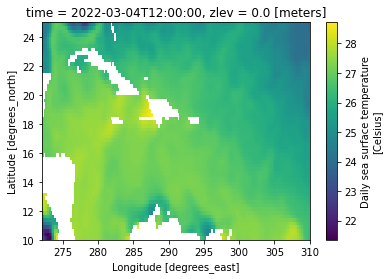

In [36]:
sst.sst.sel(lat=slice(10, 25), lon=slice(272, 310)).plot()

:::{admonition} Hint
:class: note, dropdown

Watch your data structure. Recall that `.plot()` works on a DataArray, not a Dataset.

:::

### Question 3

How many dimensions should your output array have if you did each of the following:
1. selected the 1st time value
1. selected the 1st time value and the 100th to the 200th latitude values
1. selected the 100th to the 200th latitude values and the 1000th to 1200th longitude values
1. selected the 1st time value, the 1st elevation value, the 100th to the 200th latitude values and the 1000th to 1200th longitude values
1. selected the 1st time value, 1st elevation value, the 1st latitude value and the 1st longitude value

In [42]:
# 1. 3 dimensions
# 2. 3 dimensions
# 3. 4 dimensions
# 4. 2 dimensions
# 5. 0 dimensions (a single number)